# Casement Aerordrome Weather 1945 - Present (PDA Project 2019)

## Investigation of the dataset
I will simulate a dataset, sourced from Met Eireann [1]. This dataset will be investigated and then simulated.

In [50]:
# Import pandas and load the dataset
import pandas as pd
df = pd.read_csv('mly3723.csv',skiprows=18) # read in the csv and skip the non-data explanatory rows.

The dataset contains the following variables :

year - year of the measurement

month - month of the measurement

rain - Precipitation Amount (mm)

meant - Mean Air Temperature (C)

maxtp - Maximum Air Temperature (C)

mintp - Minimum Air Temperature (C)

mnmax - Mean Maximum Temperature (C)

mnmin - Mean Minimum Temperature (C)

gmin - Grass Minimum Temperature (C)

wdsp - Mean Wind Speed (knot)

mxgt - Highest Gust (knot)

sun - Sunshine duration (hours)


In [6]:
df.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,sun
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,1991.210526,6.473684,9.466617,18.221203,-0.366165,13.234586,5.701504,61.773835,-3.856842,113.964662
std,16.010658,3.457093,3.915470,4.763040,4.318500,4.452386,3.459947,33.833433,4.528277,52.220373
min,1964.000000,1.000000,-0.500000,5.400000,-15.700000,3.300000,-4.200000,1.700000,-17.100000,22.100000
25%,1977.000000,3.000000,6.100000,13.900000,-3.700000,9.400000,2.800000,37.100000,-7.400000,67.900000
50%,1991.000000,6.000000,8.700000,18.100000,-0.900000,12.800000,5.200000,56.800000,-4.200000,110.900000
75%,2005.000000,9.000000,13.100000,22.400000,3.300000,17.200000,8.800000,79.500000,-0.200000,151.100000
max,2019.000000,12.000000,17.800000,31.000000,9.500000,23.500000,12.900000,206.300000,8.200000,256.500000


In [8]:
# Check for missing data
df.isna().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

In [9]:
# Check for missing data
df.isnull().sum()

year     0
month    0
meant    0
maxtp    0
mintp    0
mnmax    0
mnmin    0
rain     0
gmin     0
wdsp     0
maxgt    0
sun      0
dtype: int64

In [59]:
# Adding in day (assuming the first of month), so I can add python datetime
df['day'] = '01' 
df['datetime'] = pd.to_datetime(df[['year','month','day']])
df = df.set_index('datetime')
df['datetime'] = pd.to_datetime(df[['year','month','day']])

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day,datetime
datetime,,,,,,,,,,,,,,
1964-01-01,1964,1,5.5,10.9,-3.3,8.2,2.9,18.1,-7.8,,,38.9,01,1964-01-01
1964-02-01,1964,2,5.0,13.3,-6.7,7.9,2.2,22.4,-11.1,,,87.7,01,1964-02-01
1964-03-01,1964,3,5.1,13.0,-3.2,8.6,1.6,64.1,-7.4,,,74.9,01,1964-03-01
1964-04-01,1964,4,8.2,16.2,-2.4,12.2,4.2,49.5,-7.3,,,148.0,01,1964-04-01
1964-05-01,1964,5,11.7,21.3,2.9,16.2,7.2,42.8,0.4,,,195.3,01,1964-05-01
1964-06-01,1964,6,12.8,22.9,2.9,16.8,8.8,46.7,-1.0,,,136.6,01,1964-06-01
1964-07-01,1964,7,14.9,23.3,3.6,19.1,10.7,31.5,-1.7,,,150.6,01,1964-07-01
1964-08-01,1964,8,14.1,23.1,1.5,18.5,9.6,78.7,-2.6,,,176.1,01,1964-08-01
1964-09-01,1964,9,13.2,21.6,1.9,17.6,8.9,44.5,-1.4,,,159.7,01,1964-09-01


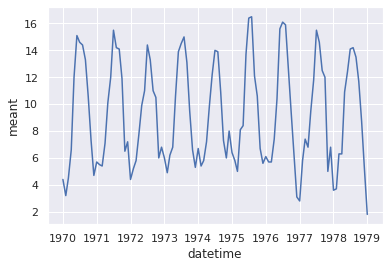

In [70]:
import seaborn as sns
sns.set(style="darkgrid")
ts = df['1970-01-01':'1979-01-01'] # 108 months
#ts.describe()
sns.lineplot(x='datetime',y="meant",data=ts);

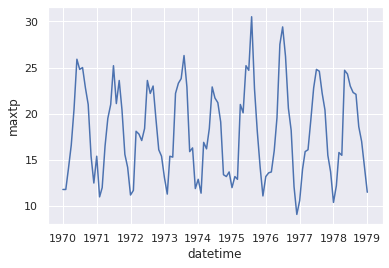

In [72]:
sns.lineplot(x='datetime',y="maxtp",data=ts);

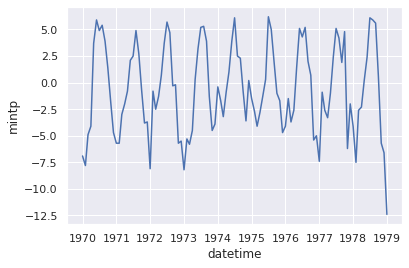

In [73]:
sns.lineplot(x='datetime',y="mintp",data=ts);

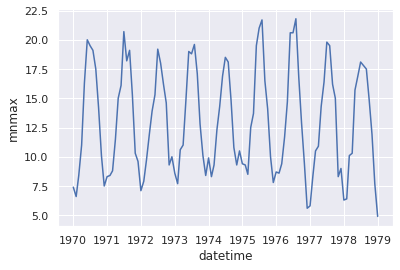

In [74]:
sns.lineplot(x='datetime',y="mnmax",data=ts);

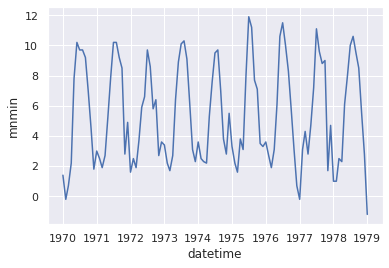

In [75]:
sns.lineplot(x='datetime',y="mnmin",data=ts);

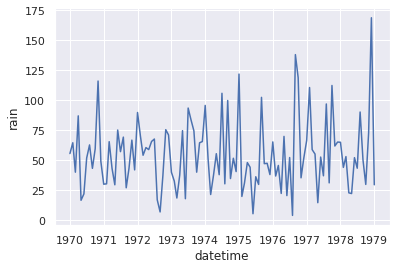

In [76]:
sns.lineplot(x='datetime',y="rain",data=ts);

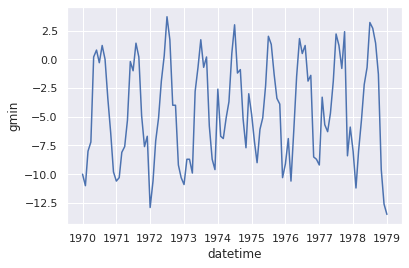

In [77]:
sns.lineplot(x='datetime',y="gmin",data=ts);

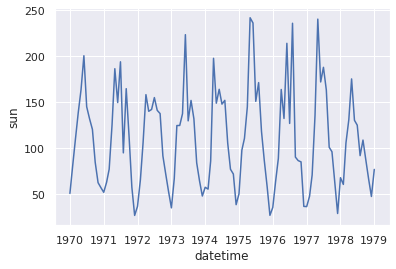

In [78]:
sns.lineplot(x='datetime',y="sun",data=ts);

***
## References
[1] Casement Aerodrome Monthly Data 1944 - Present :  https://cli.fusio.net/cli/climate_data/webdata/mly3723.zip